In [1]:
from pathlib import Path

In [3]:
submissions = list(Path(".").glob("**/*.csv"))

In [4]:
submissions

[PosixPath('hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv'),
 PosixPath('cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv'),
 PosixPath('bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv'),
 PosixPath('resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv'),
 PosixPath('cnn_8layer_attention_summary_window_40_step_20_submission.csv'),
 PosixPath('senet-resnet_50-summary_window_40_step_20_submission.csv'),
 PosixPath('kernel_results/transformer-multiple-dropouts_submission.csv'),
 PosixPath('kernel_results/roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv'),
 PosixPath('kernel_results/attention-feature-engineering-aug-multidrop_submission.csv'),
 PosixPath('kernel_results/braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv'),
 PosixPath('kernel_results/vsb-base-neural-networ-dropout_submission.csv')]

In [5]:
len(submissions)

11

In [6]:
import pandas as pd

In [15]:
df = pd.concat([pd.read_csv(path).rename({"target": path.name.replace("_subamission.csv", "")}, axis=1) for path in submissions], axis=1)

In [16]:
df[:10]

,signal_id,hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv,signal_id,cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv,signal_id,bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv,signal_id,resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv,signal_id,cnn_8layer_attention_summary_window_40_step_20_submission.csv,...,signal_id,transformer-multiple-dropouts_submission.csv,signal_id,roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv,signal_id,attention-feature-engineering-aug-multidrop_submission.csv,signal_id,braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv,signal_id,vsb-base-neural-networ-dropout_submission.csv
0,8712,False,8712,False,8712,False,8712,False,8712,False,...,8712,0,8712,0,8712,0,8712,0,8712,0
1,8713,False,8713,False,8713,False,8713,False,8713,False,...,8713,0,8713,0,8713,0,8713,0,8713,0
2,8714,False,8714,False,8714,False,8714,False,8714,False,...,8714,0,8714,0,8714,0,8714,0,8714,0
3,8715,False,8715,False,8715,False,8715,False,8715,False,...,8715,0,8715,0,8715,0,8715,0,8715,0
4,8716,False,8716,False,8716,False,8716,False,8716,False,...,8716,0,8716,0,8716,0,8716,0,8716,0
5,8717,False,8717,False,8717,False,8717,False,8717,False,...,8717,0,8717,0,8717,0,8717,0,8717,0
6,8718,False,8718,False,8718,False,8718,False,8718,False,...,8718,0,8718,0,8718,0,8718,0,8718,0
7,8719,False,8719,False,8719,False,8719,False,8719,False,...,8719,0,8719,0,8719,0,8719,0,8719,0
8,8720,False,8720,False,8720,False,8720,False,8720,False,...,8720,0,8720,0,8720,0,8720,0,8720,0
9,8721,False,8721,False,8721,False,8721,False,8721,False,...,8721,0,8721,0,8721,0,8721,0,8721,0


In [17]:
df = df.loc[:,~df.columns.duplicated()]

In [18]:
df[:10]

,signal_id,hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv,cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv,bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv,resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv,cnn_8layer_attention_summary_window_40_step_20_submission.csv,senet-resnet_50-summary_window_40_step_20_submission.csv,transformer-multiple-dropouts_submission.csv,roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv,attention-feature-engineering-aug-multidrop_submission.csv,braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv,vsb-base-neural-networ-dropout_submission.csv
0,8712,False,False,False,False,False,False,0,0,0,0,0
1,8713,False,False,False,False,False,False,0,0,0,0,0
2,8714,False,False,False,False,False,False,0,0,0,0,0
3,8715,False,False,False,False,False,False,0,0,0,0,0
4,8716,False,False,False,False,False,False,0,0,0,0,0
5,8717,False,False,False,False,False,False,0,0,0,0,0
6,8718,False,False,False,False,False,False,0,0,0,0,0
7,8719,False,False,False,False,False,False,0,0,0,0,0
8,8720,False,False,False,False,False,False,0,0,0,0,0
9,8721,False,False,False,False,False,False,0,0,0,0,0


In [19]:
from sklearn.metrics import confusion_matrix

In [31]:
from itertools import permutations

In [25]:
model_columns = df.columns.tolist()

In [28]:
model_columns.remove("signal_id")

In [44]:
cms = [(col1, col2, confusion_matrix(df[col1].values, df[col2].values, labels=[True, False])) for col1, col2 in permutations(model_columns, 2)]

In [45]:
import seaborn as sns

In [46]:
from IPython.core.display import display

In [48]:
for cm in cms:
    print(" - ".join(cm[:2]))
    display(cm[-1])
    print()

hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  423,    60],
       [  129, 19725]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  417,    66],
       [  303, 19551]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   483],
       [    0, 19854]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  420,    63],
       [  120, 19734]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  426,    57],
       [  210, 19644]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  369,   114],
       [  291, 19563]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  399,    84],
       [  303, 19551]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  402,    81],
       [  264, 19590]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  408,    75],
       [  264, 19590]])


hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  399,    84],
       [  231, 19623]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  423,   129],
       [   60, 19725]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  465,    87],
       [  255, 19530]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   552],
       [    0, 19785]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  474,    78],
       [   66, 19719]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  480,    72],
       [  156, 19629]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  408,   144],
       [  252, 19533]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  438,   114],
       [  264, 19521]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  432,   120],
       [  234, 19551]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  447,   105],
       [  225, 19560]])


cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  435,   117],
       [  195, 19590]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  417,   303],
       [   66, 19551]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  465,   255],
       [   87, 19530]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   720],
       [    0, 19617]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  456,   264],
       [   84, 19533]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  555,   165],
       [   81, 19536]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  537,   183],
       [  123, 19494]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  570,   150],
       [  132, 19485]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  543,   177],
       [  123, 19494]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  570,   150],
       [  102, 19515]])


bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  540,   180],
       [   90, 19527]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[    0,     0],
       [  483, 19854]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[    0,     0],
       [  552, 19785]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[    0,     0],
       [  720, 19617]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[    0,     0],
       [  540, 19797]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[    0,     0],
       [  636, 19701]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - transformer-multiple-dropouts_submission.csv


array([[    0,     0],
       [  660, 19677]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[    0,     0],
       [  702, 19635]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[    0,     0],
       [  666, 19671]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[    0,     0],
       [  672, 19665]])


resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[    0,     0],
       [  630, 19707]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  420,   120],
       [   63, 19734]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  474,    66],
       [   78, 19719]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  456,    84],
       [  264, 19533]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   540],
       [    0, 19797]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  477,    63],
       [  159, 19638]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  411,   129],
       [  249, 19548]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  432,   108],
       [  270, 19527]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  426,   114],
       [  240, 19557]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  444,    96],
       [  228, 19569]])


cnn_8layer_attention_summary_window_40_step_20_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  426,   114],
       [  204, 19593]])


senet-resnet_50-summary_window_40_step_20_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  426,   210],
       [   57, 19644]])


senet-resnet_50-summary_window_40_step_20_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  480,   156],
       [   72, 19629]])


senet-resnet_50-summary_window_40_step_20_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  555,    81],
       [  165, 19536]])


senet-resnet_50-summary_window_40_step_20_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   636],
       [    0, 19701]])


senet-resnet_50-summary_window_40_step_20_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  477,   159],
       [   63, 19638]])


senet-resnet_50-summary_window_40_step_20_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  489,   147],
       [  171, 19530]])


senet-resnet_50-summary_window_40_step_20_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  498,   138],
       [  204, 19497]])


senet-resnet_50-summary_window_40_step_20_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  501,   135],
       [  165, 19536]])


senet-resnet_50-summary_window_40_step_20_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  504,   132],
       [  168, 19533]])


senet-resnet_50-summary_window_40_step_20_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  489,   147],
       [  141, 19560]])


transformer-multiple-dropouts_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  369,   291],
       [  114, 19563]])


transformer-multiple-dropouts_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  408,   252],
       [  144, 19533]])


transformer-multiple-dropouts_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  537,   123],
       [  183, 19494]])


transformer-multiple-dropouts_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   660],
       [    0, 19677]])


transformer-multiple-dropouts_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  411,   249],
       [  129, 19548]])


transformer-multiple-dropouts_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  489,   171],
       [  147, 19530]])


transformer-multiple-dropouts_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  558,   102],
       [  144, 19533]])


transformer-multiple-dropouts_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  543,   117],
       [  123, 19554]])


transformer-multiple-dropouts_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  543,   117],
       [  129, 19548]])


transformer-multiple-dropouts_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  537,   123],
       [   93, 19584]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  399,   303],
       [   84, 19551]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  438,   264],
       [  114, 19521]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  570,   132],
       [  150, 19485]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   702],
       [    0, 19635]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  432,   270],
       [  108, 19527]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  498,   204],
       [  138, 19497]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  558,   144],
       [  102, 19533]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  612,    90],
       [   54, 19581]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  651,    51],
       [   21, 19614]])


roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  609,    93],
       [   21, 19614]])


attention-feature-engineering-aug-multidrop_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  402,   264],
       [   81, 19590]])


attention-feature-engineering-aug-multidrop_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  432,   234],
       [  120, 19551]])


attention-feature-engineering-aug-multidrop_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  543,   123],
       [  177, 19494]])


attention-feature-engineering-aug-multidrop_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   666],
       [    0, 19671]])


attention-feature-engineering-aug-multidrop_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  426,   240],
       [  114, 19557]])


attention-feature-engineering-aug-multidrop_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  501,   165],
       [  135, 19536]])


attention-feature-engineering-aug-multidrop_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  543,   123],
       [  117, 19554]])


attention-feature-engineering-aug-multidrop_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  612,    54],
       [   90, 19581]])


attention-feature-engineering-aug-multidrop_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  603,    63],
       [   69, 19602]])


attention-feature-engineering-aug-multidrop_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  588,    78],
       [   42, 19629]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  408,   264],
       [   75, 19590]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  447,   225],
       [  105, 19560]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  570,   102],
       [  150, 19515]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   672],
       [    0, 19665]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  444,   228],
       [   96, 19569]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  504,   168],
       [  132, 19533]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  543,   129],
       [  117, 19548]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  651,    21],
       [   51, 19614]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  603,    69],
       [   63, 19602]])


braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv - vsb-base-neural-networ-dropout_submission.csv


array([[  615,    57],
       [   15, 19650]])


vsb-base-neural-networ-dropout_submission.csv - hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv


array([[  399,   231],
       [   84, 19623]])


vsb-base-neural-networ-dropout_submission.csv - cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv


array([[  435,   195],
       [  117, 19590]])


vsb-base-neural-networ-dropout_submission.csv - bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv


array([[  540,    90],
       [  180, 19527]])


vsb-base-neural-networ-dropout_submission.csv - resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv


array([[    0,   630],
       [    0, 19707]])


vsb-base-neural-networ-dropout_submission.csv - cnn_8layer_attention_summary_window_40_step_20_submission.csv


array([[  426,   204],
       [  114, 19593]])


vsb-base-neural-networ-dropout_submission.csv - senet-resnet_50-summary_window_40_step_20_submission.csv


array([[  489,   141],
       [  147, 19560]])


vsb-base-neural-networ-dropout_submission.csv - transformer-multiple-dropouts_submission.csv


array([[  537,    93],
       [  123, 19584]])


vsb-base-neural-networ-dropout_submission.csv - roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv


array([[  609,    21],
       [   93, 19614]])


vsb-base-neural-networ-dropout_submission.csv - attention-feature-engineering-aug-multidrop_submission.csv


array([[  588,    42],
       [   78, 19629]])


vsb-base-neural-networ-dropout_submission.csv - braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv


array([[  615,    15],
       [   57, 19650]])

In [50]:
oversampled_df = pd.read_csv('resnet_50_aug_summary_window_40_step_20_oversampling_submission.csv')

In [53]:
oversampled_df.target.value_counts()

False    20337
Name: target, dtype: int64

The oversamlig model predict all of the test samples as False. 
It should be removed.

In [54]:
df.drop([col for col in model_columns if "oversampl" in col], axis=1, inplace=True)

In [55]:
df.shape

(20337, 11)

In [63]:
model_columns = [col for col in model_columns if "oversampl" not in col]

In [65]:
len(model_columns)

10

In [49]:
# for cm in cms:
#     display(sns.heatmap(cm[-1]), title="_".join(cm[:2]))

# count True

In [67]:
df["n_true"] = df[model_columns].T.sum(axis=0).T.values

In [68]:
df[:10]

,signal_id,hierarchical_gru-summary-window-400-step-200-not-scaled_submission.csv,cnn-attention_multiple_dropout_glu-summary_window_40_step_20_submission.csv,bigru_attention_mixup_window_5000_summary_mixup_3_submission.csv,cnn_8layer_attention_summary_window_40_step_20_submission.csv,senet-resnet_50-summary_window_40_step_20_submission.csv,transformer-multiple-dropouts_submission.csv,roydatascience-eda-iso-pca-lle-stratified-lstm-attention_submission.csv,attention-feature-engineering-aug-multidrop_submission.csv,braquino-5-fold-lstm-attention-fully-commented-0-694_submission.csv,vsb-base-neural-networ-dropout_submission.csv,n_true
0,8712,False,False,False,False,False,0,0,0,0,0,0.0
1,8713,False,False,False,False,False,0,0,0,0,0,0.0
2,8714,False,False,False,False,False,0,0,0,0,0,0.0
3,8715,False,False,False,False,False,0,0,0,0,0,0.0
4,8716,False,False,False,False,False,0,0,0,0,0,0.0
5,8717,False,False,False,False,False,0,0,0,0,0,0.0
6,8718,False,False,False,False,False,0,0,0,0,0,0.0
7,8719,False,False,False,False,False,0,0,0,0,0,0.0
8,8720,False,False,False,False,False,0,0,0,0,0,0.0
9,8721,False,False,False,False,False,0,0,0,0,0,0.0


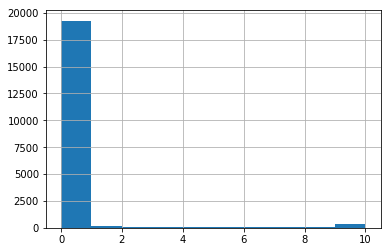

In [76]:
df.n_true.hist()

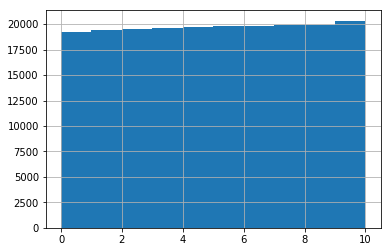

In [81]:
df.n_true.hist(cumulative=1)

In [77]:
df.n_true.value_counts()

0.0     19269
10.0      330
1.0       195
2.0        99
5.0        90
4.0        75
9.0        69
3.0        63
6.0        57
7.0        54
8.0        36
Name: n_true, dtype: int64

# vote model

In [72]:
df["half_true"] = df.n_true >= 5

In [73]:
df["3_true"] = df.n_true >= 3

In [78]:
df["2_true"] = df.n_true >= 2

In [80]:
df[["half_true", "3_true", "2_true"]].describe()

,half_true,3_true,2_true
count,20337,20337,20337
unique,2,2,2
top,False,False,False
freq,19701,19563,19464


In [82]:
df["2_true"][:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: 2_true, dtype: bool

In [91]:
vote_2_df = df[["signal_id", "2_true"]].rename({"2_true": "target"}, axis=1) 

In [92]:
vote_2_df[:10]

,signal_id,target
0,8712,False
1,8713,False
2,8714,False
3,8715,False
4,8716,False
5,8717,False
6,8718,False
7,8719,False
8,8720,False
9,8721,False


In [93]:
confusion_matrix(vote_2_df.target, df["vsb-base-neural-networ-dropout_submission.csv"], labels=[True, False])

array([[  630,   243],
       [    0, 19464]])

In [100]:
confusion_matrix(vote_2_df.target, df["attention-feature-engineering-aug-multidrop_submission.csv"], labels=[True, False])

array([[  648,   225],
       [   18, 19446]])

In [95]:
vote_2_df.to_csv("vote_2_stack.csv", index=None)

In [96]:
vote_5_df = df[["signal_id", "half_true"]].rename({"half_true": "target"}, axis=1) 

In [97]:
vote_5_df[:10]

,signal_id,target
0,8712,False
1,8713,False
2,8714,False
3,8715,False
4,8716,False
5,8717,False
6,8718,False
7,8719,False
8,8720,False
9,8721,False


In [98]:
confusion_matrix(vote_5_df.target, df["vsb-base-neural-networ-dropout_submission.csv"], labels=[True, False])

array([[  582,    54],
       [   48, 19653]])

In [99]:
vote_5_df.to_csv("vote_5_stack.csv", index=None)